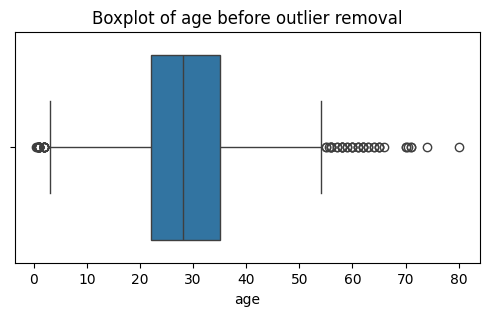

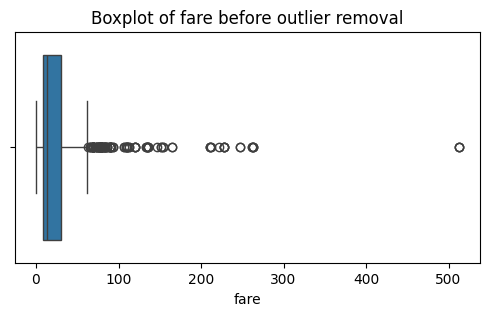

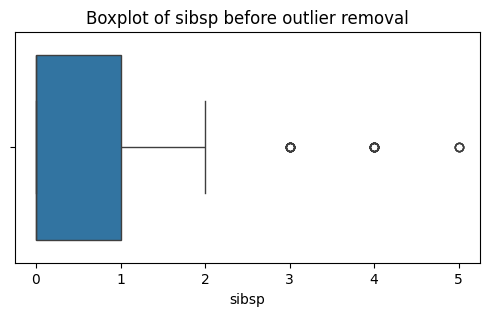

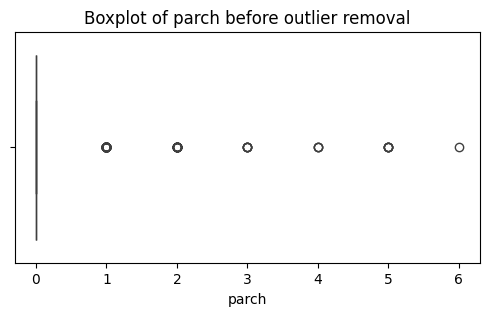

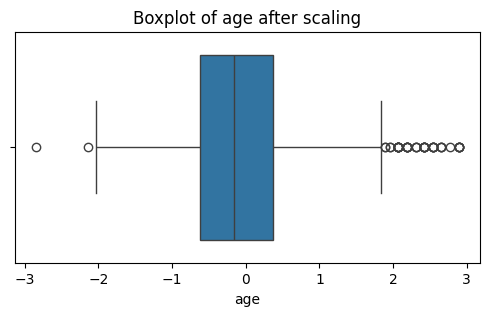

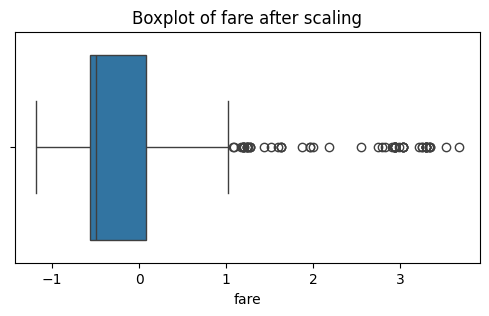

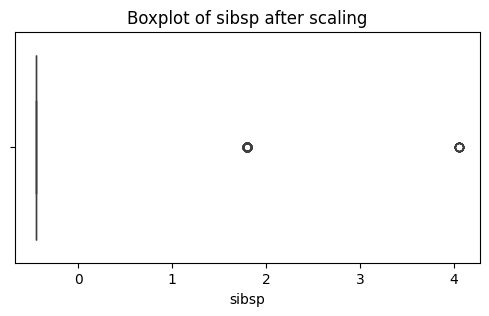

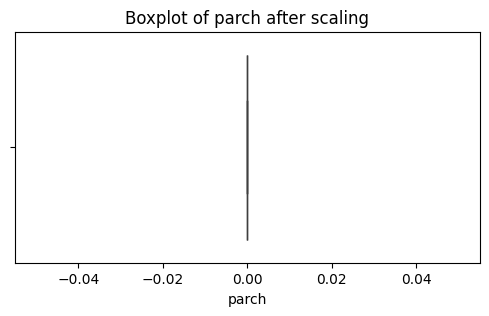

✅ Data cleaned, encoded, outliers removed, scaled, and saved as 'dataset_final.csv'


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("c:/Users/kapil/OneDrive/Desktop/Internship/Titanic-Dataset.csv")

# Step 2: Initial Cleaning
df = df.drop(columns=['Cabin'])  # Drop column with too many missing values
df['Age'] = df['Age'].fillna(df['Age'].median())  # Fill missing Age with median
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Fill missing Embarked with mode
df = df.drop_duplicates()  # Remove duplicate rows

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Strip whitespace in object columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].map(lambda x: x.strip() if isinstance(x, str) else x)

# Step 3: Encode categorical features
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

# Step 4: Visualize and Remove Outliers using IQR (before scaling)
num_cols = ['age', 'fare', 'sibsp', 'parch']

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

for col in num_cols:
    # Boxplot before removal
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} before outlier removal')
    plt.show()
    
    # Remove outliers
    df = remove_outliers(df, col)

# Optional: reset index after outlier removal
df.reset_index(drop=True, inplace=True)

# Step 5: Standardize numerical features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Optional: Boxplots after scaling
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} after scaling')
    plt.show()

# Step 6: Save the final preprocessed dataset
df.to_csv("c:/Users/kapil/OneDrive/Desktop/Internship/dataset_final.csv", index=False)

print("✅ Data cleaned, encoded, outliers removed, scaled, and saved as 'dataset_final.csv'")
